# Dogs vs Cats v3
## Kaggle Dataset의 일부를 이용한 개, 고양이 구분
### Dog Image: 1,111개, Cat Image: 1,111개, 총 2,222개
### one-hot encoding --> Logistic회귀
- one hot encoding삭제, model에서 마지막 dense에서 1과 sigmoid로 변경, compile에서 binary-crossentropy 변경

### 출처: [pontoregende GitHub](https://github.com/pontorezende/Dogs-vs-Cats-Redux-with-CNN)

In [114]:
import numpy as np   
from glob import glob
import cv2, os, random
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [116]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [117]:
path='dogs-vs-cats/train/'

##### Train set 만들기

In [118]:
## used for resize and in our model
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [119]:
dog_path = os.path.join(path, 'dog.5*')
len(glob(dog_path))

1111

In [120]:
## Load some our dog images (1,111 개 이미지)
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [121]:
## Load some our cat images (1,111 개 이미지)
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [122]:
classes = ['dog', 'cat']

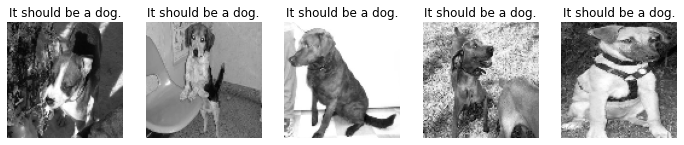

In [123]:
plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

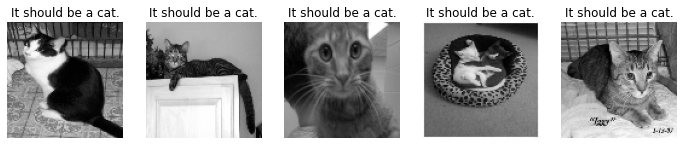

In [124]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [125]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [126]:
y_dogs[:5]

[1, 1, 1, 1, 1]

In [127]:
y_dogs[0], y_cats[0]

(1, 0)

In [128]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [129]:
X_train = np.concatenate((dogs,cats), axis=0)
y_train = np.concatenate((y_dogs, y_cats), axis=0)

In [130]:
X_train.shape, y_train.shape

((2222, 96, 96, 1), (2222,))

###### Test set (dog.12*, cat12* ) 만들기

In [131]:
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [132]:
dog_path = os.path.join(path, 'dog.12*')
len(glob(dog_path))

611

In [133]:
## Load some our dog images (611 개 이미지)
dog_path = os.path.join(path, 'dog.12*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)

In [134]:
## Load some our cat images (611 개 이미지)
cat_path = os.path.join(path, 'cat.12*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

In [135]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [136]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [137]:
dogs.shape

(611, 96, 96, 1)

In [138]:
X_test = np.concatenate((dogs,cats), axis=0)
y_test = np.concatenate((y_dogs, y_cats), axis=0)

In [139]:
len(X_test)

1222

###### 모델 설정

In [140]:
## Here is our model as a CNN
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), 
           activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(1, activation='sigmoid')    ##변경
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 64)       

In [141]:
model.compile(loss='binary_crossentropy',            ##변경
              optimizer=Adam(), metrics=['accuracy'])

In [142]:
## to save checkpoint to use later
modelpath = "model/dogs_vs_cats-cnn3-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

##### 모델 학습

In [143]:
X_train.shape

(2222, 96, 96, 1)

In [144]:
y_train.shape

(2222,)

In [145]:
model.fit(X_train, y_train, batch_size=32, epochs=40, validation_split=0.2, shuffle=True,
          callbacks=[checkpointer])  ## early_stopping_callback 배제시킴

Train on 1777 samples, validate on 445 samples
Epoch 1/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.7224 - accuracy: 0.6091
Epoch 00001: val_loss improved from inf to 0.90156, saving model to model/dogs_vs_cats-cnn3-01-0.9016.hdf5
1777/1777 [==============================] - 30s 17ms/sample - loss: 0.7219 - accuracy: 0.6095 - val_loss: 0.9016 - val_accuracy: 0.0000e+00
Epoch 2/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.6590 - accuracy: 0.6256
Epoch 00002: val_loss improved from 0.90156 to 0.88524, saving model to model/dogs_vs_cats-cnn3-02-0.8852.hdf5
1777/1777 [==============================] - 29s 17ms/sample - loss: 0.6592 - accuracy: 0.6252 - val_loss: 0.8852 - val_accuracy: 0.0000e+00
Epoch 3/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.6481 - accuracy: 0.6335
Epoch 00003: val_loss did not improve from 0.88524
1777/1777 [==============================] - 28s 15ms/sample - loss: 0.6482 - accuracy: 0.6331 - val_loss: 0

Epoch 29/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.0133 - accuracy: 0.9960
Epoch 00029: val_loss did not improve from 0.75184
1777/1777 [==============================] - 27s 15ms/sample - loss: 0.0132 - accuracy: 0.9961 - val_loss: 3.3391 - val_accuracy: 0.5101
Epoch 30/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.0117 - accuracy: 0.9955
Epoch 00030: val_loss did not improve from 0.75184
1777/1777 [==============================] - 27s 15ms/sample - loss: 0.0116 - accuracy: 0.9955 - val_loss: 3.1678 - val_accuracy: 0.5483
Epoch 31/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.0137 - accuracy: 0.9977
Epoch 00031: val_loss did not improve from 0.75184
1777/1777 [==============================] - 27s 15ms/sample - loss: 0.0136 - accuracy: 0.9977 - val_loss: 3.8836 - val_accuracy: 0.5124
Epoch 32/40
1760/1777 [============================>.] - ETA: 0s - loss: 0.0241 - accuracy: 0.9920
Epoch 00032: val_loss did not improve fr

In [149]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/dogs_vs_cats-cnn-05-0.7518.hdf5')

In [150]:
scores = model.evaluate(X_test, y_test, verbose=2)
print('MODEL ACCURACY: %.5f' % scores[1])

1222/1222 - 4s - loss: 0.6871 - accuracy: 0.5663
MODEL ACCURACY: 0.56628
